In [271]:
import numpy
from numpy import dstack
from skimage.io import imread, imshow, imsave
from skimage import img_as_float

In [272]:
def transform(img):
    #Преобразование значений изображения в вещественные
    img_f= img_as_float(img)
    height = img.shape[0]
    width = img.shape[1]
    #Разделение изображение на три равные части по высоте
    divideSize = round(height/3)
    b = img[0:divideSize, 0:width]
    g = img[divideSize:2*divideSize, 0:width]
    r = img[2*divideSize:3*divideSize, 0:width]
    #Обрезка по краям на 5%
    percentCutH = round(divideSize*0.05)
    percentCutW = round(width*0.05)
    bCut=b[percentCutH:divideSize-percentCutH, percentCutW:width-percentCutW]
    gCut=g[percentCutH:divideSize-percentCutH, percentCutW:width-percentCutW]
    rCut=r[percentCutH:divideSize-percentCutH, percentCutW:width-percentCutW]
    #Вызов функции, выполняющей сдвиг синего\красного канала, наложение на зелёный и подсчёт корреляции
    bNew = shift(5,gCut,bCut)
    rNew = shift(5,gCut,rCut)
    #Совмещение каналов
    result_img = dstack((rNew,gCut,bNew))
    return result_img

In [273]:
def shift(pixelsCount, gChannel, shiftChannel):
    maxCorr=0
    ishift = 0
    jshift = 0
    for i in range(pixelsCount):
        bufi = numpy.roll(shiftChannel, i, 0)
        for j in range(pixelsCount):   
            bufj = numpy.roll(bufi, j, 1)
            corr = (bufj*gChannel).sum()
            if corr>maxCorr:
                maxCorr = corr
                ishift=i
                jshift = j
    
    result1 = numpy.roll(shiftChannel, ishift, 0)
    result = numpy.roll(result1, jshift, 1)
    return result

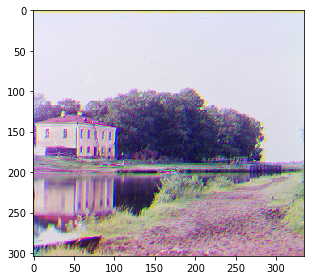

In [274]:
#Загрузка изображений
img_1 = imread('01.jpg')
img_2 = imread('02.jpg')
img_3 = imread('03.jpg')

imshow(transform(img_1))

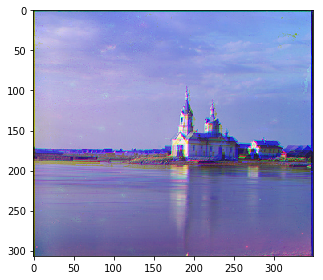

In [275]:
imshow(transform(img_2))

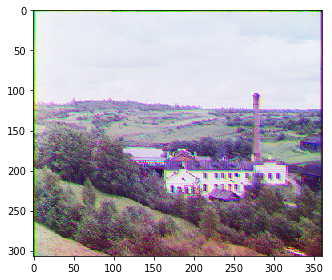

In [276]:
imshow(transform(img_3))